# 이미지 학습

## 모델 불러오기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

model = VGG16(weights= 'imagenet', include_top = True)

553467904/553467096 [==============================] - 55s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## 동물 인식

### VGG16

In [13]:
DIR = './src/'

(224, 224, 3)


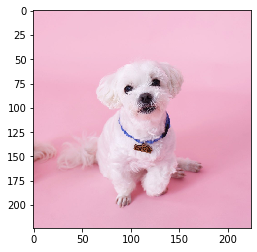

In [14]:
img_path = DIR + 'leo1.jpg'
img = image.load_img(img_path, target_size=(224,224))

x=image.img_to_array(img)
print(x.shape)
plt.imshow(x/255.0)

In [7]:
x = np.expand_dims(x, axis = 0)
print(x.shape)

(1, 224, 224, 3)


In [8]:
x = preprocess_input(x) # 차원은 그대로, 값이 조금 보정되어 나옴
pred = model.predict(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


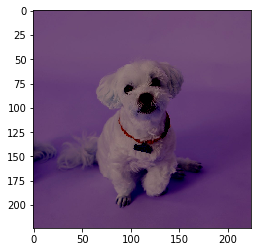

In [9]:
plt.imshow(x[0,:,:,:]/255.0)

(1, 1000)


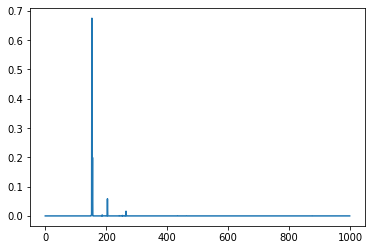

In [11]:
print(pred.shape)
plt.plot(pred[0,:])

In [12]:
print('Predicted:', decode_predictions(pred,top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02085936', 'Maltese_dog', 0.67406934), ('n02086240', 'Shih-Tzu', 0.19915289), ('n02098413', 'Lhasa', 0.058357958)]


(224, 224, 3)
(1, 224, 224, 3)
(1, 1000)
Predicted: [('n02096585', 'Boston_bull', 0.20116664), ('n02086240', 'Shih-Tzu', 0.18054813), ('n02110958', 'pug', 0.101832025)]


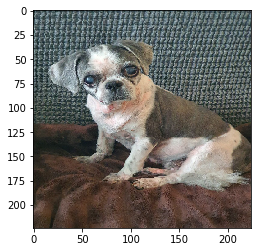

In [23]:
img_path = DIR + 'dan1.jpg'
img = image.load_img(img_path, target_size=(224,224))

x=image.img_to_array(img)
print(x.shape)
plt.imshow(x/255.0)

x = np.expand_dims(x, axis = 0)
print(x.shape)

x = preprocess_input(x) 
pred = model.predict(x)

print(pred.shape)

print('Predicted:', decode_predictions(pred,top=3)[0])

(224, 224, 3)
(1, 224, 224, 3)
(1, 1000)
Predicted: [('n02086240', 'Shih-Tzu', 0.9234687), ('n02098413', 'Lhasa', 0.057127725), ('n02086079', 'Pekinese', 0.013195154)]


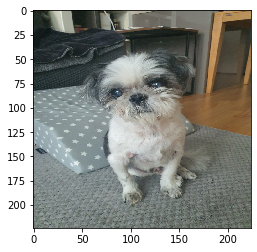

In [24]:
img_path = DIR + 'dan2.jpg'
img = image.load_img(img_path, target_size=(224,224))

x=image.img_to_array(img)
print(x.shape)
plt.imshow(x/255.0)

x = np.expand_dims(x, axis = 0)
print(x.shape)

x = preprocess_input(x) 
pred = model.predict(x)

print(pred.shape)
print('Predicted:', decode_predictions(pred,top=3)[0])

In [26]:
r = decode_predictions(pred, top=3)[0]
print(r[0][1], r[0][2])

Shih-Tzu 0.9234687


In [27]:
import json

json_data = json.load(open('imagenet_class_index.json'))
json_data["386"]

['n02504458', 'African_elephant']

In [28]:
json_data[f"{np.argmax(pred)}"]

['n02086240', 'Shih-Tzu']

In [38]:
img = cv2.imread(DIR + 'dan2.jpg')
img = cv2.resize(img, (224,224))
img = img.reshape(-1,224,224,3)
print(img.shape)

img=preprocess_input(img)
pred = model.predict(img)
json_data[f"{np.argmax(pred)}"][1]

(1, 224, 224, 3)


'Shih-Tzu'

In [37]:
from googletrans import Translator

translator = Translator()
result = translator.translate(result, dest='ko')
print(result.text)

Shih-Tzu


In [55]:
def toKor(word) :
    word = word.replace("_", " ")
    translator = Translator()
    result = translator.translate(word, dest="ko")
    return result.text

In [56]:
toKor(json_data[f"{np.argmax(pred)}"][1])

'몰타어 개'

In [57]:
import time

hdic = []
for d in json_data :
    k = toKor(json_data[d][1])
    hdic.append(k)
    print(json_data[d][1], k)
    time.sleep(0.3)

tench 텐치
goldfish 금붕어
great_white_shark 백상아리
tiger_shark 범 상어
hammerhead 귀상어
electric_ray 전기 광선
stingray 가오리
cock 수탉
hen 대단히
ostrich 타조
brambling 불평
goldfinch 금화
house_finch 집 핀치
junco 돌진
indigo_bunting 인디고 깃발 천
robin 남자 이름
bulbul 벌불
jay 어치
magpie 까치
chickadee 총칭
water_ouzel 물 우젤
kite 연
bald_eagle 대머리 독수리
vulture 무자비한 사람
great_grey_owl 큰 회색 올빼미
European_fire_salamander 유럽식 불 도롱뇽
common_newt 일반적인 영원
eft 이다
spotted_salamander 더럽혀진 도롱뇽
axolotl Axolotl
bullfrog 황소 개구리
tree_frog 청개구리
tailed_frog 꼬리 개구리
loggerhead 얼간이
leatherback_turtle 가죽 등 거북이
mud_turtle 진흙 거북
terrapin 테라 핀
box_turtle 상자 거북
banded_gecko 줄무늬 게코
common_iguana 일반적인 이구아나
American_chameleon 미국 카멜레온
whiptail 채찍 꼬리
agama 종교
frilled_lizard 주름진 도마뱀
alligator_lizard 악어 도마뱀
Gila_monster 미친 괴물
green_lizard 녹색 도마뱀
African_chameleon 아프리카 카멜레온
Komodo_dragon 코모도 왕 도마뱀
African_crocodile 아프리카 악어
American_alligator 미국 악어
triceratops 트리케라톱스
thunder_snake 천둥 뱀
ringneck_snake 링넥 뱀
hognose_snake 돼지 뱀
green_snake 녹색 뱀
king_snake 왕 뱀
garter_snake 

cardigan 카디건
car_mirror 자동차 거울
carousel 회전 목마
carpenter's_kit 목수 키트
carton 판지 상자
car_wheel 자동차 바퀴
cash_machine 현금 인출기
cassette 카세트
cassette_player 카세트 플레이어
castle 성
catamaran 뗏목
CD_player CD 플레이어
cello 첼로
cellular_telephone 휴대폰
chain 체인
chainlink_fence chainlink 울타리
chain_mail 체인 메일
chain_saw 체인 톱
chest 가슴
chiffonier 서랍장
chime 차임
china_cabinet 중국 캐비닛
Christmas_stocking 크리스마스 스타킹
church 교회에
cinema 영화
cleaver 고기 베는 큰 칼
cliff_dwelling 절벽 주거
cloak 망토
clog 나막신
cocktail_shaker 칵테일 셰이커
coffee_mug 커피 잔
coffeepot 커피 포트
coil 코일
combination_lock 조합 잠금
computer_keyboard 컴퓨터 키보드
confectionery 과자
container_ship 컨테이너 선
convertible 바꿀 수 있는
corkscrew 빙빙 돌리다
cornet 뿔
cowboy_boot 카우보이 부츠
cowboy_hat 카우보이 모자
cradle 요람
crane 두루미
crash_helmet 헬멧
crate 나무 상자
crib 어린이 침대
Crock_Pot 돼 먹지 못한 냄비
croquet_ball 크로켓 볼
crutch 버팀목
cuirass 동체 갑옷
dam 댐
desk 책상
desktop_computer 데스크탑 컴퓨터
dial_telephone 전화 걸기
diaper 기저귀
digital_clock 디지털 시계
digital_watch 디지털 시계
dining_table 식탁
dishrag 행주
dishwasher 식기 세척기
disk_brake 디스크 브레이크

### ResNet

In [44]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

model2 = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 2s 0us/step


In [47]:
model2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [46]:
img = cv2.imread(DIR + 'dan2.jpg')
img = cv2.resize(img, (224,224))
img = img.reshape(-1,224,224,3)
print(img.shape)

img=preprocess_input(img)
pred = model2.predict(img)
json_data[f"{np.argmax(pred)}"][1]

(1, 224, 224, 3)


'Shih-Tzu'

In [48]:
img = cv2.imread(DIR + 'dan2.jpg')
img = cv2.resize(img, (224,224))
img = img.reshape(-1,224,224,3)
print(img.shape)

img=preprocess_input(img)
pred = model2.predict(img)
r = json_data[f"{np.argmax(pred)}"][1]
toKor(r)

(1, 224, 224, 3)
Shih-Tzu


In [ ]:
### Incep

In [49]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

model3 = InceptionV3(weights='imagenet')

96116736/96112376 [==============================] - 2s 0us/step


In [50]:
model3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [51]:
img = cv2.imread(DIR + 'dan2.jpg')
img = cv2.resize(img, (299,299))
img = img.reshape(-1,299,299,3)
print(img.shape)

img=preprocess_input(img)
pred = model3.predict(img)
r = json_data[f"{np.argmax(pred)}"][1]
toKor(r)

(1, 299, 299, 3)
Shih-Tzu


In [53]:
img = cv2.imread(DIR + 'leo1.jpg')
img = cv2.resize(img, (299,299))
img = img.reshape(-1,299,299,3)
print(img.shape)

img=preprocess_input(img)
pred = model3.predict(img)
r = json_data[f"{np.argmax(pred)}"][1]
toKor(r)

(1, 299, 299, 3)
Maltese_dog


## Web 연동

In [63]:
%%writefile server.py

import flask
from flask import Flask,render_template,url_for,request
import base64
import numpy as np
import cv2
from keras.models import load_model 
import io 
import json
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input


init_Base64 = 22   # data:image/png;base64, 로 시작하
app = Flask(__name__)

@app.route('/')
def home():
    return "ok~~~"


@app.route('/image', methods=['POST'])
def upload():       
    draw = request.form['photo_cap']
    draw = draw[init_Base64:]
    draw_decoded = base64.b64decode(draw)
    image = np.asarray(bytearray(draw_decoded), dtype="uint8")
    
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)    
    image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_AREA) 
    image = image.reshape(-1,224,224,3)
    
    model = ResNet50(weights='imagenet')
    
    image=preprocess_input(image)
    pred = model.predict(image)
    
    json_data = json.load(open('imagenet_class_index.json'))
    r = json_data[f"{np.argmax(pred)}"][1]

    return f"인식 결과: {r}"
    
if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py
